### import libraries for data exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### upload data

In [ ]:
dfu= pd.read_csv("heart.csv", na_values="?")

In [ ]:
dfu.head()

### data exploration - information about dataset

In [ ]:
#atributes and instances
print("atributes: ", dfu.shape[1])
print("instances: ", dfu.shape[0])

In [ ]:
#data set is labelled
dfu.target.unique()
print("El dataset esta etiquetado con las siguientes clases: ", dfu.target.unique())


In [ ]:
# cuantos atributos numericos y cuantos categoricos
dfcat = dfu.copy()
mapping = {0: 'False', 1: 'True'}
dfcat['target'] = pd.Categorical(dfcat['target'].map(mapping))
# ¿Cuántos atributos son numéricos y cuántos categóricos? (sumandolos)
print("El numero de atributos numericos es: ", dfcat.select_dtypes(include=np.number).shape[1])
print("El numero de atributos categoricos es: ", dfcat.select_dtypes(include=['category']).shape[1])

In [ ]:
dfcat.head()

In [ ]:
# Moda de los atributos categóricos
print("La moda de los atributos categoricos es: ", dfcat.select_dtypes(include=['category']).mode())

In [ ]:
# media rangos y desviacion estandar de los atributos numericos.
describedf = dfcat.describe()
describedf.loc['range'] = describedf.loc['max'] - describedf.loc['min']
describedf.loc['std'] = describedf.loc['std'].round(2)
# Show only range and min
describedf.loc[['mean','range','std']].T.rename(columns={'mean':'Media','range':'Rango','std':'Desviacion estandar'})

In [ ]:
# ¿Cuántos valores faltantes hay por atributo?
print("Valores faltantes por atributo: ", dfcat.isna().sum())


In [ ]:
# Determine la distribución de las clases
dfcat['target'].value_counts(normalize=True).apply(lambda x: format(x, '.2%') )

In [ ]:
# Grafica de la distribucion de las clases con porcentaje en los ejes y labels
ax = dfcat['target'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Distribucion de las clases', fontsize=20)
ax.set_xlabel('Resultados', fontsize=18)
ax.set_ylabel('Porcentaje', fontsize=18)
ax.set_xticklabels(['True', 'False'], rotation='horizontal', fontsize=15)
ax.set_ylim(0, 1)
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=15)
for i in ax.patches:
    ax.text(i.get_x() + 0.2, i.get_height() + 0.01, str(round((i.get_height() * 100), 2)) + '%', fontsize=15)
plt.show()


In [ ]:
# determinar si hay atributos con valores atipicos
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(dfcat.columns) - 1:
        sns.boxplot(x='target', y=dfcat.columns[i], data=dfcat, ax=ax)
        ax.set_title(dfcat.columns[i])
    else:
        ax.set_axis_off()
plt.show()

### 2. Aplique al menos dos estrategias diferentes para manejar los datos faltantes.

In [ ]:
# Eliminar las filas con datos faltantes
dfcat.dropna(inplace=True)
# Reemplazar los datos faltantes con la media de la columna
dfu.fillna(dfu.mean(), inplace=True)

### Convierta todos los atributos numéricos a categóricos utilizando dos estrategias diferentes.

In [ ]:
# Convierta todas los atributos numéricos a categóricos utilizando dos estrategias diferentes.
df_categorico = dfcat.copy()

# Convertir los atributos numéricos a categóricos utilizando el método de discretización por anchura de intervalo con un bucle
for col in df_categorico.columns:
    if df_categorico[col].dtype != 'object' and df_categorico[col].dtype != 'category':
        df_categorico[col] = pd.cut(df_categorico[col], bins=3, labels=['Bajo', 'Medio', 'Alto'])
df_categorico

In [ ]:
df_KBinsDiscretizer = dfcat.copy()

from sklearn.preprocessing import KBinsDiscretizer

# Seleccionar las columnas numéricas
numeric_cols = df_KBinsDiscretizer.select_dtypes(include='number').columns.tolist()

# Crear un objeto KBinsDiscretizer y transformar los datos
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df_KBinsDiscretizer[numeric_cols] = discretizer.fit_transform(df_KBinsDiscretizer[numeric_cols])

def map_discrete_values(x):
    if x == 0:
        return 'Bajo'
    elif x == 1:
        return 'Medio'
    else:
        return 'Alto'

# Aplicar la función al dataframe
df_KBinsDiscretizer[numeric_cols] = df_KBinsDiscretizer[numeric_cols].applymap(map_discrete_values)

df_KBinsDiscretizer

### Transforme el conjunto de datos de manera que todos los atributos sean numéricos, Normalizados.

In [ ]:
# Transforme el conjunto de datos de manera que todos los atributos sean numéricos, Normalizados.

df_numerico = df_KBinsDiscretizer.copy()

# Convertir los atributos categóricos a numéricos
for col in df_numerico.columns:
    if df_numerico[col].dtype == 'object' or df_numerico[col].dtype == 'category':
        df_numerico[col] = df_numerico[col].astype('category').cat.codes

# Normalizar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_numerico = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)

df_numerico

### Escoja una técnica para la detección de datos atípicos y aplíquela sobre el conjunto de datos.

In [62]:
# Escoja una técnica para la detección de datos atípicos y aplíquela sobre el conjunto de datos.
df_outliers = dfu.copy()

# detectar outliers
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, contamination=0.01)
clf.fit(df_outliers)
y_pred = clf.predict(df_outliers)
df_outliers['outlier'] = y_pred

#mostrar outliers
df_outliers[df_outliers['outlier'] == -1]

C:\UNIVERSIDAD LOCAL\MINERIA DE DATOS\project\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,outlier
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,-1
150,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,-1
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,-1
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,-1
508,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,-1
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,-1
624,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,-1
661,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,-1
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,-1
896,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,-1


### Definir las Variables Independiente y Dependientes (Realizar un análisis de la Matriz de Covarianza y Test Correlación Pearson)

In [66]:
# test correation pearson
corr_matrix = dfcat.drop('target', axis=1).corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672


### matriz correación

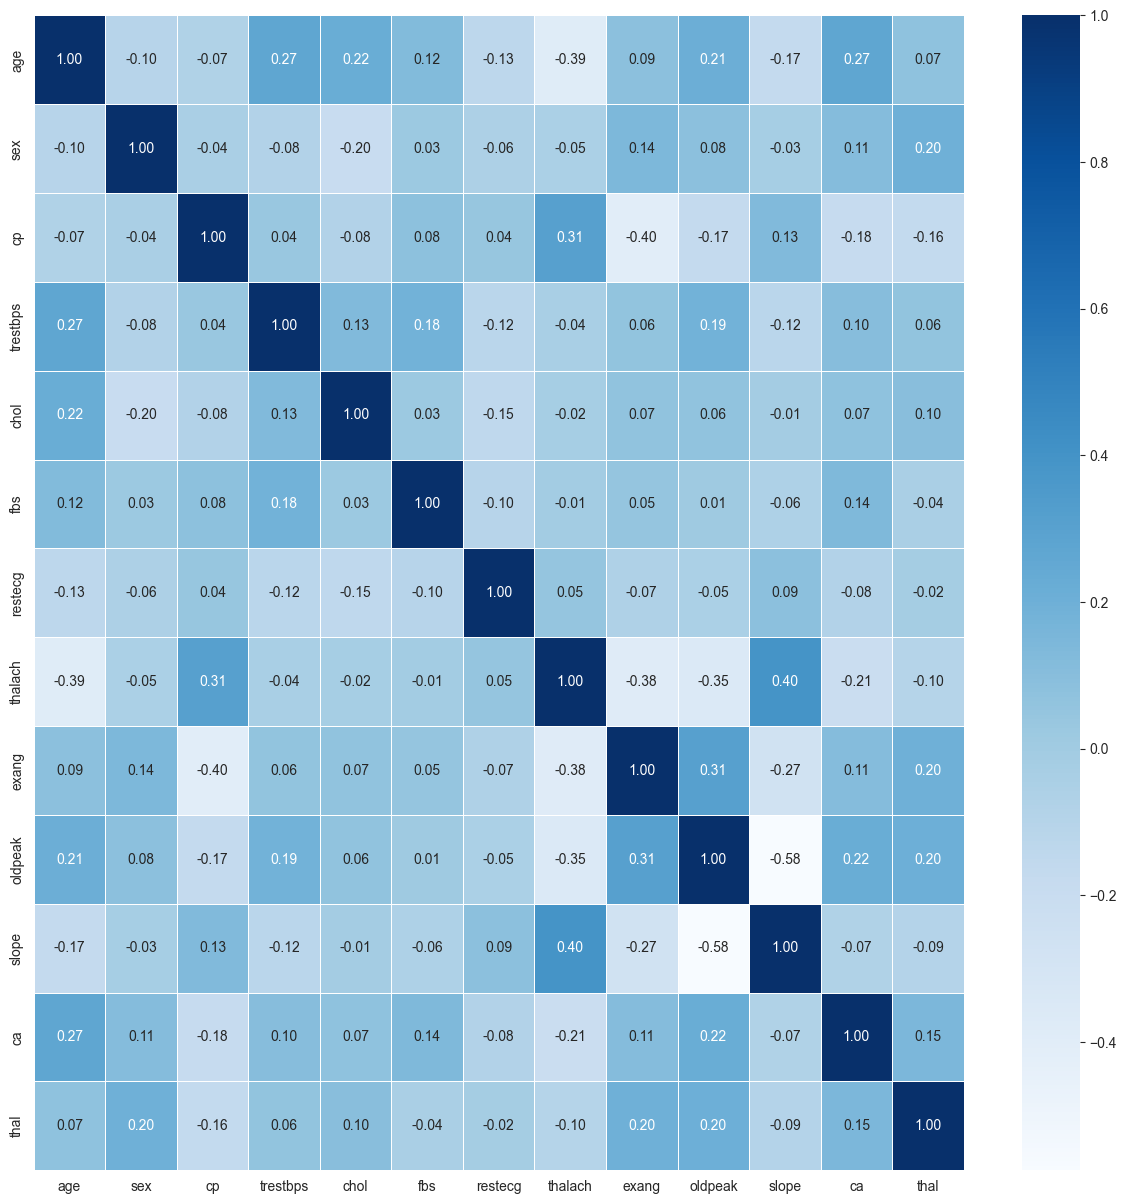

In [67]:
# correlation matrix without target
corr = dfcat.drop("target", axis=1).corr()
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, ax=ax,cmap="Blues")
plt.show()

### Existe alguna relación entre la Información de los atributos, Pruebe diferentes combinaciones entre los atributos y establezca las relaciones entre ellos, reporte la herramienta de visualización que utilizó para tal fin.


In [70]:
SAVE = False;
if SAVE:
    dfu.to_csv("heart_categorical.csv")
print("Valores no se están guardando")

Valores no se están guardando


### matriz de dispersión de los atributos con mayor correlación

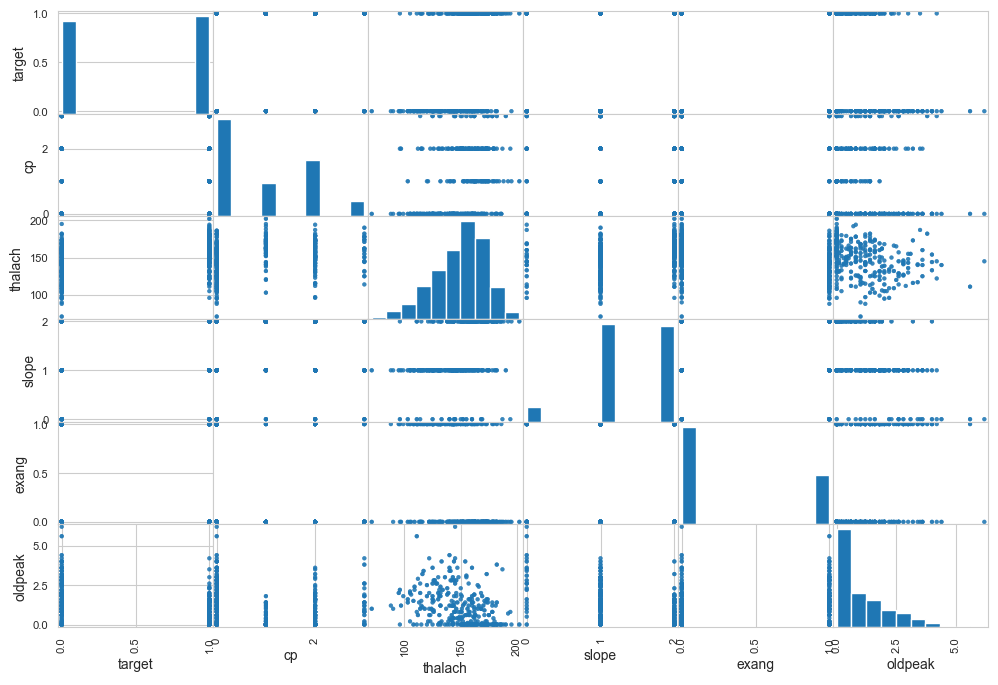

In [83]:
from pandas.plotting import scatter_matrix

#determianr los atributos con mayor correlación y luego graficarlos
corr_matrix = dfu.corr()
corr_matrix["target"].sort_values(ascending=False)

# atributos con mayor correlación grafica interactiva para ver los datos
attributes = ["target", "cp", "thalach", "slope", "exang", "oldpeak"]
scatter_matrix(dfu[attributes], figsize=(12, 8))
plt.show()

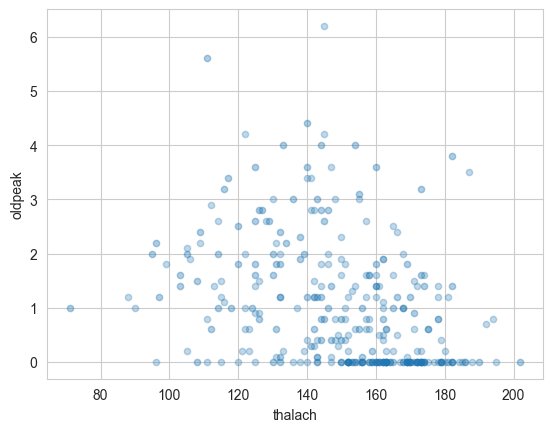

In [82]:
# graficar thalach vs oldpeak disérción
dfu.plot(kind="scatter", x="thalach", y="oldpeak", alpha=0.1)
plt.show()

### Modelamiento predictivo

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [85]:
x = dfcat.drop("target", axis=1)
y = dfcat.target

In [86]:
dfcat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,False
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,False
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,False
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,False
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,False


In [95]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7)


In [96]:
#create pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

In [97]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [98]:
y_pred = pipe.predict(x_test)

In [99]:
#metrics in porcent
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred, average='micro') * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred, average='micro') * 100:.2f}%")
print(f"F1: {f1_score(y_test, y_pred, average='micro') * 100:.2f}%")


Accuracy: 84.40%
Precision: 84.40%
Recall: 84.40%
F1: 84.40%


### MATRIZ DE CONFUSION

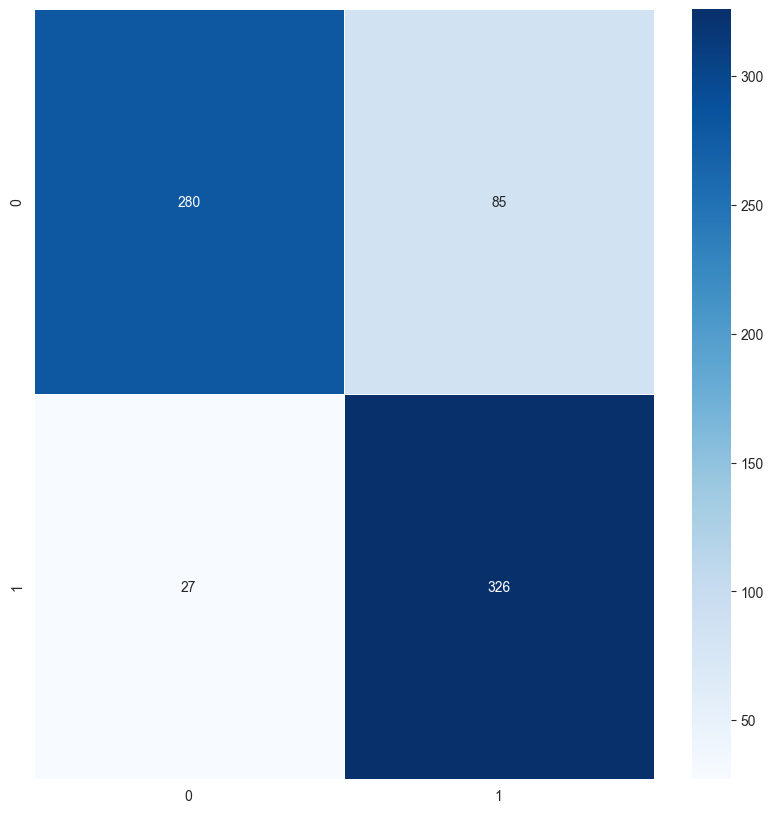

In [100]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#visualize confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="Blues")
plt.show()


<img src="https://www.juanbarrios.com/wp-content/uploads/2019/07/MATRIZ-CONFUSION.png">

### reporte matriz de confusión

* TP: Verdaderos Positivos
* TN: Verdaderos Negativos
* FP: Falsos Positivos
* FN: Falsos Negativos

El modelo logró predecir correctamente de un 70% de datos usados para

In [ ]:
# matriz de confusión con porcentajes y labels
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap="Blues")
plt.show()


In [104]:
# llevar los datos de entrenamiento a un dataframe
df_train = pd.DataFrame(x_train, columns=x_train.columns)
df_train['target'] = y_train
df_train.head()

# llevar los datos de prueba a un dataframe
df_test = pd.DataFrame(x_test, columns=x_test.columns)
df_test['target'] = y_test
df_test['target_pred'] = y_pred
df_test.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_pred
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2,True,True
154,63,1,0,130,330,1,0,132,1,1.8,2,3,3,False,False
489,61,1,2,150,243,1,1,137,1,1.0,1,0,2,True,True
609,55,0,0,180,327,0,2,117,1,3.4,1,0,2,False,False
324,48,1,1,130,245,0,0,180,0,0.2,1,0,2,True,True
